## 📚 Import Required Libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Load the Dataset
df = pd.read_csv(r"D:\Projects\Car Price\Car Price Prediction.csv")

## 🔍 Exploratory Data Analysis (EDA)

Let’s explore the structure of the dataset, check for missing values, and understand feature distributions.

In [2]:
# Display the first few rows of the dataset
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [4]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
df.isnull().sum

<bound method DataFrame.sum of        mpg   cylinders   cubicinches     hp   weightlbs   time-to-60   year  \
0    False       False         False  False       False        False  False   
1    False       False         False  False       False        False  False   
2    False       False         False  False       False        False  False   
3    False       False         False  False       False        False  False   
4    False       False         False  False       False        False  False   
..     ...         ...           ...    ...         ...          ...    ...   
256  False       False         False  False       False        False  False   
257  False       False         False  False       False        False  False   
258  False       False         False  False       False        False  False   
259  False       False         False  False       False        False  False   
260  False       False         False  False       False        False  False   

      brand  
0     

## 🧹 Data Cleaning and Preprocessing

- Handle missing values
- Convert categorical variables using encoding
- Drop unnecessary columns

In [6]:
# Extracting features
X = df.iloc[:, :-1].values

# Convert columns to numeric
X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean
X.fillna(X.mean(), inplace=True)

In [7]:
X.head()

,0,1,2,3,4,5,6
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


## 📉 Using the Elbow Method to Determine Optimal Clusters

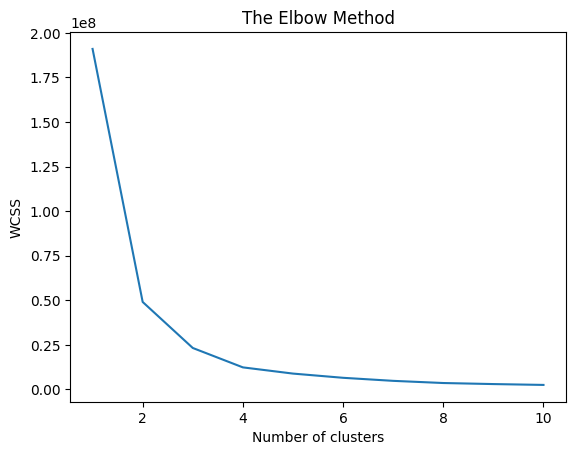

In [8]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Apply K-Means Clustering

In [9]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1])

## Cluster Centers

In [10]:
kmeans.cluster_centers_

array([[2.95466102e+01, 4.05084746e+00, 1.07669492e+02, 7.70338983e+01,
        2.24153390e+03, 1.66101695e+01, 1.97771186e+03],
       [2.02012346e+01, 6.11111111e+00, 2.24727394e+02, 1.09074074e+02,
        3.19351235e+03, 1.56790123e+01, 1.97671605e+03],
       [1.48064516e+01, 7.83870968e+00, 3.47289015e+02, 1.58629032e+02,
        4.23211290e+03, 1.33548387e+01, 1.97525806e+03]])

## 📊 Visualizing the Clusters

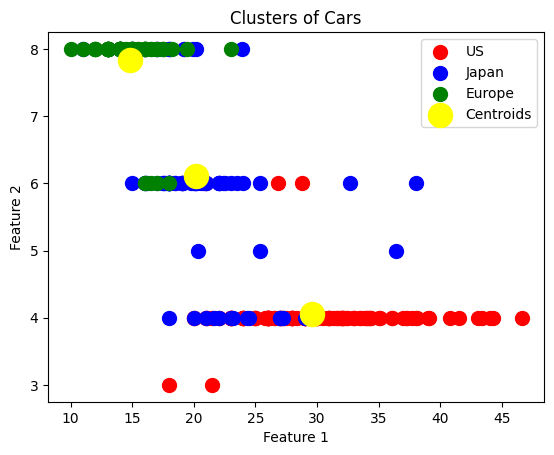

In [11]:


# Visualizing the clusters
plt.scatter(X[y_kmeans == 0][0], X[y_kmeans == 0][1], s=100, c='red', label='US')
plt.scatter(X[y_kmeans == 1][0], X[y_kmeans == 1][1], s=100, c='blue', label='Japan')
plt.scatter(X[y_kmeans == 2][0], X[y_kmeans == 2][1], s=100, c='green', label='Europe')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Displaying the plot
plt.title('Clusters of Cars')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
